# Zadanie 1

Za pomoca funkcji 

```python
sklearn.datasets.make_moons
```

wygeneruj 4 zbiory danych z parametrami:

  * n_samples=1000, noise=.05
  * n_samples=1000, noise=.3
  * n_samples=200, noise=.05
  * n_samples=200, noise=.3


In [1]:
import numpy as np
import sklearn.datasets

#low noise, plenty of samples, should be easy
X, y = sklearn.datasets.make_moons(n_samples=1000, noise=.05)

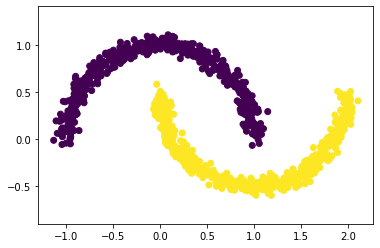

[[ 0.50438138  0.26656182]
 [ 1.22408425 -0.01985468]
 [ 0.75847233  0.56236405]
 ...
 [ 1.06156084  0.05064664]
 [ 1.16220133  0.34580465]
 [ 0.56231111 -0.22244896]]
[0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1
 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1
 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1
 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1
 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0
 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1
 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1
 1 0 0 

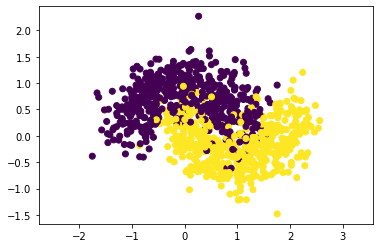

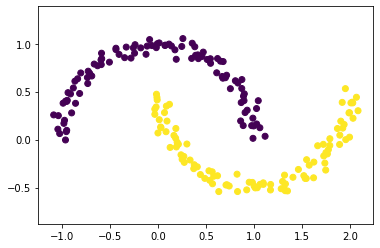

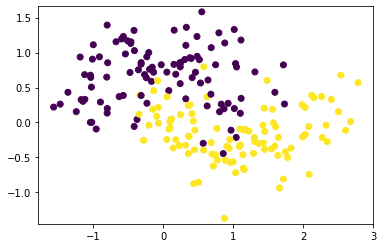

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y)
plt.axis('equal')
plt.show()

X, y = sklearn.datasets.make_moons(n_samples=1000, noise=.3)
print(X)
print(y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.axis('equal')
plt.show()

X, y = sklearn.datasets.make_moons(n_samples=200, noise=.05)
plt.scatter(X[:,0],X[:,1],c=y)
plt.axis('equal')
plt.show()

X, y = sklearn.datasets.make_moons(n_samples=200, noise=.3)
plt.scatter(X[:,0],X[:,1],c=y)
plt.axis('equal')
plt.show()

# Zadanie 2

Do równania prostej w postaci ogólnej

$$
Ax + By + C = 0
$$

łatwo znaleść współrzedne wektora prostopadłego do wykresu

$$
W = [A,B].
$$

Łatwo policzyć, że dla funkcji

$$
y = ax+b
$$

mamy

$$
A=-a, B=1, C=-b
$$

Dla danych z poprzedniego zadania narysuj dowolna prosta przchodzcą przez środek układu współrzednych i dokonaj klasyfikacji.
Dane po lewej stronie mają być oznaczone jako -1 a prawej jako +1. Użyj iloczynu skalarnego oraz wektora normalnego do prostej.

Narysuj odpowiedni rysunek.

In [3]:
a=-1
b=.5

A= -a
B= 1
C= -b

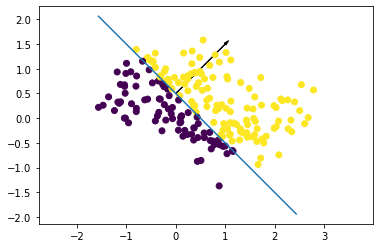

In [4]:
x = np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.5)
yx = a*x+b
plt.arrow(0, b, A, B, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.plot(x, yx)

y_cl=np.sign(np.dot( X, np.array([A,B]))+C)
y_cl[y_cl==-1]=0   

plt.scatter(X[:, 0], X[:, 1], c=y_cl)
plt.axis('equal')
plt.show()



In [5]:
class fixed_plan(object):
    """
    """
    def __init__(self, a=0.5, b=0):
        self.a=a
        self.b=b

        self.A=-self.a
        self.B=1
        self.C=-self.b

    def fit(self, X, y):
        return self
    
    def predict(self, X):
        """Return class label after unit step"""
        y_cl=np.sign(np.dot( X, np.array([self.A,self.B]))+self.C) 
        y_cl[y_cl==-1]=0
        return y_cl 

# Zadanie 3
Predykcji można dokonać dla dowolnego punktu na płaszczyźnie. Wygeneruj punkty równomiernie na kwadracie zawierającym punkty i wykonaj dla nich predykcję.

Oryginalny zbiór danych niech będzie pokolorowany za pomocą oryginalnych klas. Narysuj wszystko na jednym wykresie.

In [6]:
# !pip install mlxtend
from mlxtend.plotting import plot_decision_regions


<AxesSubplot:>

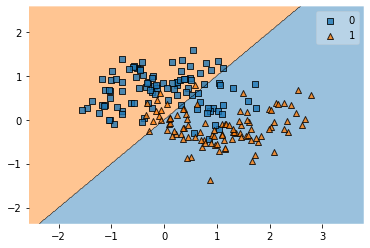

In [7]:
classifier=fixed_plan(a=1,b=0)
classifier.fit(X,y)
plot_decision_regions(X, y, classifier)

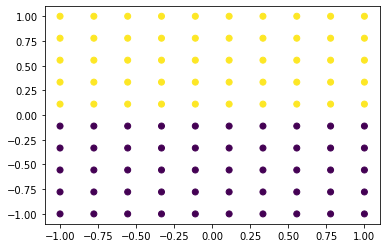

/tmp/ipykernel_915/2100204278.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plot_decision_regions(A.astype(np.int), c.astype(np.int), classifier)


<AxesSubplot:>

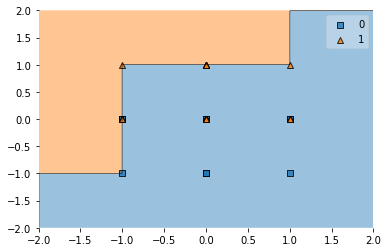

In [24]:
A = []
c = []
for x in np.linspace(-1, 1, 10):
    for y in np.linspace(-1, 1, 10):
        A.append([x, y])
        if y > 0:
            c.append(1)
        else:
            c.append(0)
A = np.array(A)
c = np.array(c)
plt.scatter(A[:,0],A[:,1], c=c)
plt.show()
classifier=fixed_plan(a=1,b=0)
classifier.fit(X,y)
plot_decision_regions(A.astype(np.int), c.astype(np.int), classifier)